In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np


#Binary Classification


In [1]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=10000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.9766081871345029


#Multiclass

In [4]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a random forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 1.0


#Multi-Label Classification

In [7]:
!pip install scikit-multilearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 487.4 kB/s eta 0:00:00


In [8]:
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import ClassifierChain
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [9]:
# Create a synthetic multi-label dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a classifier chain with a random forest classifier
model = ClassifierChain(RandomForestClassifier())

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.68


#Imbalanced Classification

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [11]:
# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Create a random forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_res, y_res)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       270
           1       0.57      0.70      0.63        30

    accuracy                           0.92       300
   macro avg       0.77      0.82      0.79       300
weighted avg       0.93      0.92      0.92       300



#Random Forest

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Accuracy: 100.00%


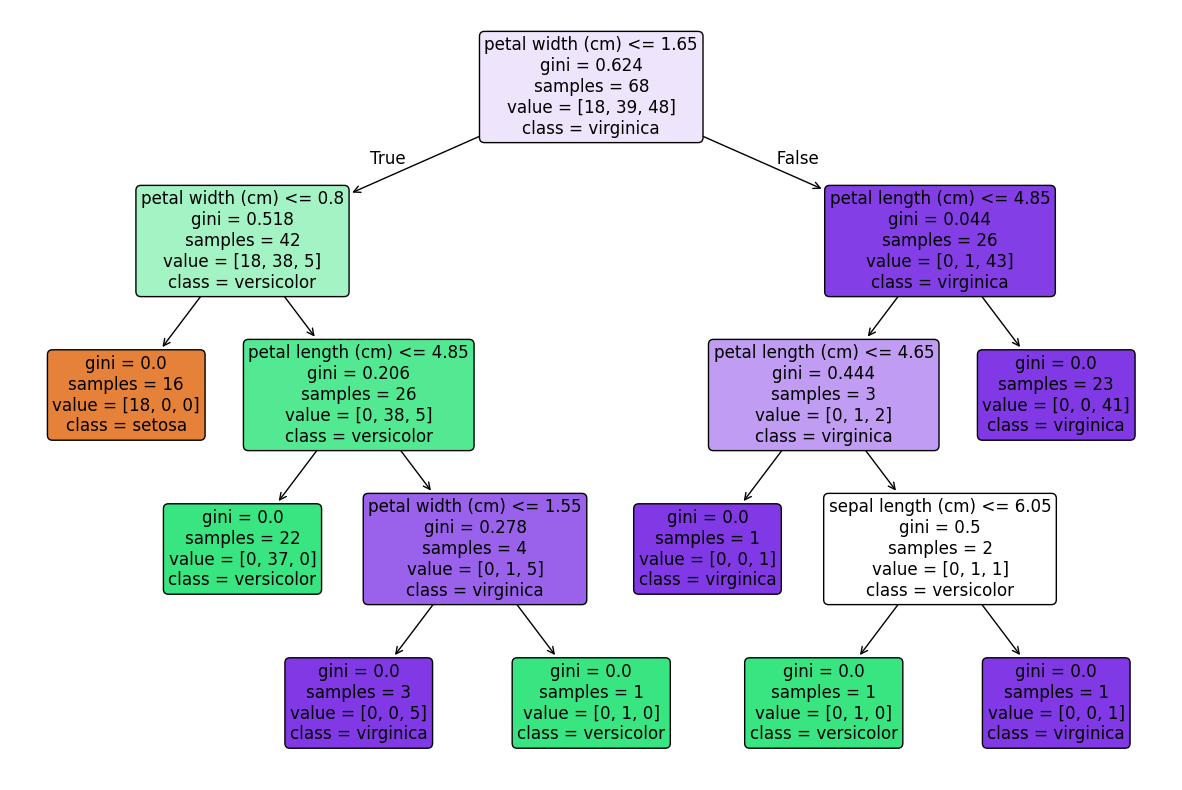

In [14]:
# Step 1: Load the dataset (Iris dataset)
data = load_iris()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
plt.figure(figsize=(15,10))
plot_tree(model.estimators_[0], filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.show()


#KNN

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Accuracy: 100.00%


/tmp/ipython-input-19-3486727455.py:49: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors='r', marker='x', s=80, label="Test Data")


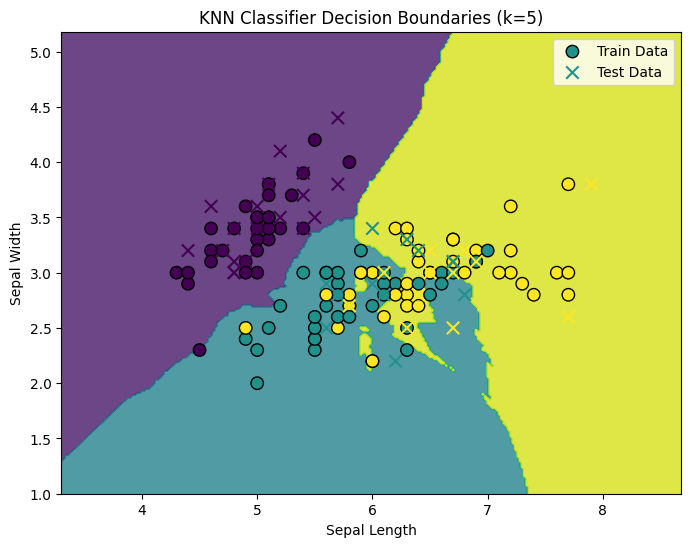

In [19]:
# Step 1: Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create a KNN classifier with k=5 (5 nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=5)

# Step 4: Train the model using the training data
knn.fit(X_train, y_train)

# Step 5: Make predictions using the test data
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Optional: Visualize the decision boundary (for 2 features)
plt.figure(figsize=(8, 6))

# Use only two features for visualization (e.g., sepal length and sepal width)
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Create a KNN model and fit it to the 2D data for visualization
knn.fit(X_train_2d, y_train)
h = .02
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict labels for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', s=80, label="Train Data")

# Plot the test points
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors='r', marker='x', s=80, label="Test Data")

plt.title("KNN Classifier Decision Boundaries (k=5)")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='best')
plt.show()
